**Автор: Анна Смелова**

## Решение домашнего задания к уроку 3 “Логистическая регрессия. Log Loss”

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
display(X,y)

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [4]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

### Задание 1*
#### Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [7]:
def calc_logloss(y, y_pred):
    # Изменения - начало
    y_pred_mod = [x + 0.0001 if x==0 else x for x in y_pred]
    y_pred = np.array([x - 0.0001 if x==1 else x for x in y_pred_mod])
    # Изменения - конец
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [8]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

0.05273026032907981

### Задание 2
#### Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [9]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % 100 == 0:
            print(i, W, err)
    return W, err

Построим график зависимости значения Log Loss от параметра eta и количества итераций.

In [10]:
def select_params(etas, n_iters):
    errors_full = {}
    for i in n_iters:
        errors_full[i]=[]

    best_error = np.inf
    best_params = {}

    np.random.seed(42)
    W_start = np.random.randn(X_st.shape[1])
    n = X_st.shape[0]

    for eta in etas:
        for n_iter in n_iters:
            W = W_start.copy()
            curr_eta = eta

            for i in range(n_iter):
                z = np.dot(X_st, W)
                y_pred = sigmoid(z)
                err = calc_logloss(y, y_pred)

                dQ = 1/n * X_st.T @ (y_pred - y)
                W -= curr_eta * dQ
            errors_full[n_iter].append(err)
            #print(curr_eta, n_iter, err, W)
            if err < best_error:
                best_error = err
                best_params = {
                    'eta': curr_eta,
                    'n_iter': n_iter
                }
    #print(f'Лучшая ошибка {best_error} с параметрами {best_params}')
    return best_error, best_params, errors_full

In [11]:
# Сначала рассмотрим большие etas
etas_1 = np.linspace(1, 20, 100)
n_iters_1 = [10, 100, 250, 500, 800, 1000, 5000]

result_1 = select_params(etas_1, n_iters_1)
print(f'Лучшая ошибка {result_1[0]} с параметрами {result_1[1]}')

# Теперь рассмотрим etas<=1
etas_2 = np.linspace(1e-6, 1, 100)
n_iters_2 = [10, 100, 250, 500, 800, 1000, 5000]
result_2 = select_params(etas_2, n_iters_2)
print(f'Лучшая ошибка {result_2[0]} с параметрами {result_2[1]}')

Лучшая ошибка 0.018969185710984854 с параметрами {'eta': 19.808080808080806, 'n_iter': 5000}
Лучшая ошибка 0.1438003796511719 с параметрами {'eta': 1.0, 'n_iter': 5000}


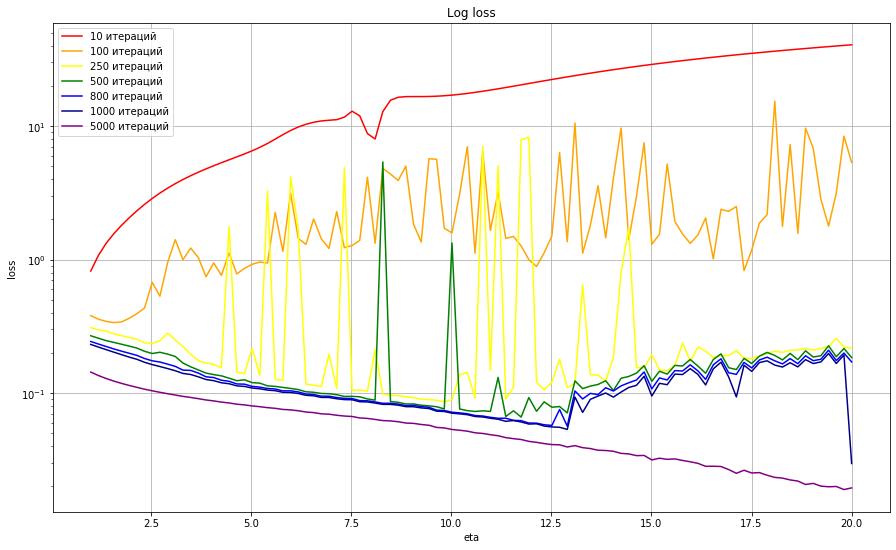

In [12]:
# Визуализируем первый результат
from pylab import rcParams

rcParams["figure.figsize"] = 15, 9

iters = [{'iter':10, 'color':'red'},
         {'iter':100, 'color':'orange'},
         {'iter':250, 'color':'yellow'},
         {'iter':500, 'color':'green'},
         {'iter':800, 'color':'blue'},
         {'iter':1000, 'color':'DarkBlue'},
         {'iter':5000, 'color':'purple'}
        ]  
for i in range(len(iters)):
    errs_1=result_1[2][iters[i]['iter']]
    plt.plot (etas_1, errs_1, color=iters[i]['color'], label = f'{iters[i]["iter"]} итераций')

plt.yscale('log')
#plt.xlim(1e-6,1)
#plt.ylim(1e-6,2)
plt.title('Log loss')
plt.xlabel('eta')
plt.ylabel('loss')
plt.legend()

plt.grid(True)
plt.show()

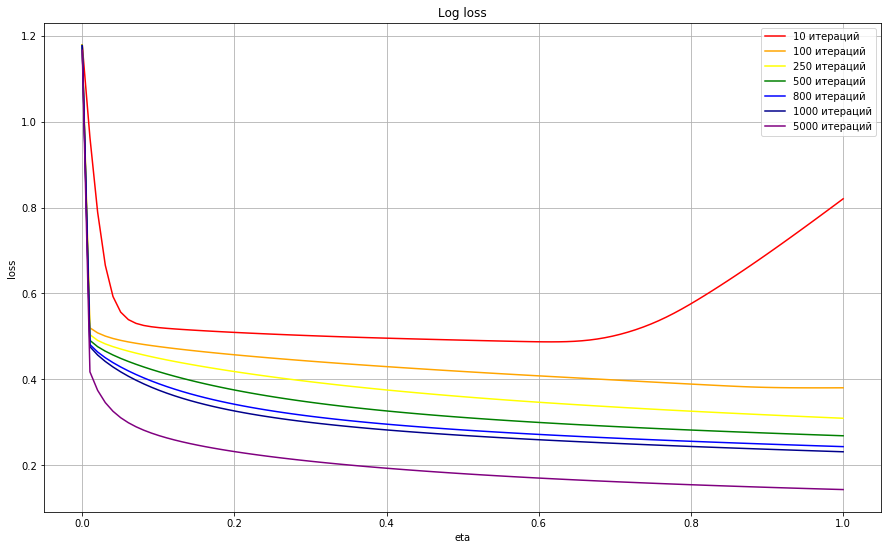

In [13]:
# Визуализируем второй результат
for i in range(len(iters)):
    errs_2=result_2[2][iters[i]['iter']]
    plt.plot (etas_2, errs_2, color=iters[i]['color'], label = f'{iters[i]["iter"]} итераций')

#plt.yscale('log')
#plt.xlim(1e-6,0.1)
#plt.ylim(1e-6,2)
plt.title('Log loss')
plt.xlabel('eta')
plt.ylabel('loss')
plt.legend()

plt.grid(True)
plt.show()

По графикам видно, что ошибка падает с ростом количества итераций и увеличением значения параметра eta.<br>
Количество итераций выберем 800, т.к. 800,1000 и 5000 ведут себя примерно одинаково.<br>
Но слишком сильно увеличивать параметр eta плохо, т.к. рискуем столкнуться с переобучением.<br> 
Остановимся на параметрах {'eta': 3, 'n_iter': 800} для случая "большого eta".<br>
На втором графике видна как бы точка перегиба примерно при eta=0.01, после нее убываение замедляется, рассмотрим ее, т.е. параметры {'eta': 0.01, 'n_iter': 800}.

In [14]:
W_1 = eval_model(X_st, y, iterations=800, eta=3)
W1 = W_1[0]
W_2 = eval_model(X_st, y, iterations=800, eta=0.01)
W2 = W_2[0]
print('______________________________________')
print(f'eta={3} W={W_1[0]} LogLoss={W_1[1]}\n')
print(f'eta={0.01} W={W_2[0]} LogLoss={W_2[1]}')

0 [-0.64144649 -4.49089227  0.56554728 -0.17540895] 1.1785958344356262
100 [-8.22246403 -5.69918923  1.37871718 11.50108478] 0.8813807511578317
200 [-13.65808356  -2.03435024  -2.68080052  12.22231623] 0.21824770183199083
300 [-16.35536529  -2.34823417  -3.94277613  13.79514445] 0.19855199112601468
400 [-17.64897713  -2.58113172  -4.3428572   14.8996011 ] 0.1989538691508405
500 [-18.83846034  -2.48013174  -4.70968291  15.83952151] 0.18133358098552604
600 [-19.91794603  -2.49697621  -5.05434406  16.67364291] 0.17253852741296652
700 [-20.90628618  -2.51934508  -5.36365373  17.44307522] 0.16537730858420022
0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
100 [ 0.29954562 -0.70184086  0.66393101  1.28809857] 0.5200176817937363
200 [ 0.21783205 -0.71711535  0.72830416  1.28039917] 0.5083938298746018
300 [ 0.15081179 -0.71601562  0.78172777  1.29014996] 0.500908097886405
400 [ 0.09214433 -0.71718068  0.82443144  1.306414  ] 0.49535059743739646
500 [ 0.03982235 -0.720647

### Задание 3
#### Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [15]:
def calc_pred_proba(X, W):
    y_pred_proba = sigmoid(np.dot(W, X))
    return y_pred_proba

In [16]:
print(f'y_orig = {y}\n')
print(f'W1 = {W1}')
y_pred_proba_1 = calc_pred_proba(X_st.T, W1)
print(f'y_pred_proba_1 = {y_pred_proba_1}')
print(f'W2 = {W2}')
y_pred_proba_2 = calc_pred_proba(X_st.T, W2)
print(f'y_pred_proba_2 = {y_pred_proba_2}')

y_orig = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]

W1 = [-21.74954945  -2.34011382  -5.62911512  18.25484958]
y_pred_proba_1 = [4.20531831e-01 6.64609202e-02 9.99996924e-01 1.95613581e-05
 9.02523652e-01 1.87986932e-01 9.99999754e-01 9.23517765e-02
 5.64600397e-01 9.99943977e-01]
W2 = [-0.09161818 -0.73872879  0.9256099   1.40510823]
y_pred_proba_2 = [0.41776462 0.51245225 0.69245945 0.04327322 0.80362866 0.72699631
 0.80724768 0.21299272 0.39474721 0.78395463]


### Задание 4
#### Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [17]:
def calc_pred (X, W):
    y_pred = sigmoid(np.dot(W, X))
    y_pred[y_pred <= 0.5] = 0
    y_pred[y_pred > 0.5] = 1
    return y_pred

In [18]:
print(f'y_orig = {y}\n')

print(f'W1 = {W1}')
y_pred_1 = calc_pred(X_st.T, W1)
print(f'y_pred_1 = {y_pred_1}')
print(f'W2 = {W2}')
y_pred_2 = calc_pred(X_st.T, W2)
print(f'y_pred_2 = {y_pred_2}')

y_orig = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]

W1 = [-21.74954945  -2.34011382  -5.62911512  18.25484958]
y_pred_1 = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
W2 = [-0.09161818 -0.73872879  0.9256099   1.40510823]
y_pred_2 = [0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]


### Задание 5*
#### Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [19]:
print(f'y_orig = {y}')
print(f'y_pred_1 = {y_pred_1}')
print(f'y_pred_2 = {y_pred_2}')

y_orig = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
y_pred_1 = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
y_pred_2 = [0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]


**Accuracy**:
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

In [20]:
def calc_accuracy(y_pred, y):
    acc = 0
    l = len(y_pred)
    for i in range(l):
        if y_pred[i] == y[i]:
            acc += 1
    acc /= l
    return acc

In [21]:
print(f'Accuracy_1 = {calc_accuracy(y_pred_1, y)}')
print(f'Accuracy_2 = {calc_accuracy(y_pred_2, y)}')

Accuracy_1 = 1.0
Accuracy_2 = 0.7


**Матрица ошибок**:<br>

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |  True Positive TP    |  False Positive  FP   |
| __$$a(x) = -1$$__ |   False Negative FN    |   True Negative TN   |

In [22]:
def calc_err_matrix(y_pred, y):
    d = {}
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    l = len(y_pred)
    for i in range(l):
        if y_pred[i] == 1 and y[i] == 1:
            TP += 1
        elif y_pred[i] == 1 and y[i] == 0:
            FP += 1
        elif y_pred[i] == 0 and y[i] == 0:
            TN += 1
        elif y_pred[i] == 0 and y[i] == 1:
            FN += 1
    d['TP'] = TP
    d['FP'] = FP
    d['TN'] = TN
    d['FN'] = FN
    return d

In [23]:
print(f'eta=3: {calc_err_matrix(y_pred_1, y)}')
print(f'eta=0.01: {calc_err_matrix(y_pred_2, y)}')

eta=3: {'TP': 5, 'FP': 0, 'TN': 5, 'FN': 0}
eta=0.01: {'TP': 4, 'FP': 2, 'TN': 3, 'FN': 1}


**Точность и полнота**:

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса "+1".

In [24]:
def calc_precision(y_pred, y):
    d = calc_err_matrix(y_pred, y)
    return d['TP'] / (d['TP'] + d['FP'])

In [25]:
print(f'Precision_1 = {calc_precision(y_pred_1, y)}')
print(f'Precision_2 = {calc_precision(y_pred_2, y)}')

Precision_1 = 1.0
Precision_2 = 0.6666666666666666


In [26]:
def calc_recall(y_pred, y):
    d = calc_err_matrix(y_pred, y)
    return d['TP'] / (d['TP'] + d['FN'])

In [27]:
print(f'Recall_1 = {calc_recall(y_pred_1, y)}')
print(f'Recall_2 = {calc_recall(y_pred_2, y)}')

Recall_1 = 1.0
Recall_2 = 0.8


**F1-score**:

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

In [28]:
def calc_f_score(y_pred, y):
    precision = calc_precision(y_pred, y)
    recall = calc_recall(y_pred, y)
    return (2 * precision * recall) / (precision + recall)

In [29]:
print(f'F1-score_1 = {calc_f_score(y_pred_1, y)}')
print(f'F1-score_2 = {calc_f_score(y_pred_2, y)}')

F1-score_1 = 1.0
F1-score_2 = 0.7272727272727272


In [30]:
# Все вместе
print('eta=3, iter=800')
print(f'W = {W1}')
print(f'y_orig = {y}')
print(f'y_pred = {y_pred_1}')
print(f'Accuracy = {calc_accuracy(y_pred_1, y)}')
print(calc_err_matrix(y_pred_1, y))
print(f'Precision = {calc_precision(y_pred_1, y)}')
print(f'Recall = {calc_recall(y_pred_1, y)}')
print(f'F1-score = {calc_f_score(y_pred_1, y)}\n')
print('eta=0.01, iter=800')
print(f'W = {W2}')
print(f'y_orig = {y}')
print(f'y_pred = {y_pred_2}')
print(f'Accuracy = {calc_accuracy(y_pred_2, y)}')
print(calc_err_matrix(y_pred_2, y))
print(f'Precision = {calc_precision(y_pred_2, y)}')
print(f'Recall = {calc_recall(y_pred_2, y)}')
print(f'F1-score = {calc_f_score(y_pred_2, y)}')

eta=3, iter=800
W = [-21.74954945  -2.34011382  -5.62911512  18.25484958]
y_orig = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
y_pred = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
Accuracy = 1.0
{'TP': 5, 'FP': 0, 'TN': 5, 'FN': 0}
Precision = 1.0
Recall = 1.0
F1-score = 1.0

eta=0.01, iter=800
W = [-0.09161818 -0.73872879  0.9256099   1.40510823]
y_orig = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
y_pred = [0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]
Accuracy = 0.7
{'TP': 4, 'FP': 2, 'TN': 3, 'FN': 1}
Precision = 0.6666666666666666
Recall = 0.8
F1-score = 0.7272727272727272


### Задание 6
#### Могла ли модель переобучиться? Почему?

При большом значении eta=3 мы получили идеальное предсказание. Скорей всего - это результат переобучения, так как значения весов были относительно большие.<br>
При небольшом значении eta=0.01 у нас получилась не очень точная модель. Веса получились маленькими, но и accuracy получилась 0.7. В данном случае можно даже подумать о недообучении. Но исходных данных слишком мало, чтобы этот момент проверить. 